In [150]:
import pandas as pd
import numpy as np
from dtw import dtw
import math
import pickle
import os
import re
from ipywidgets import FileUpload


# Getting the data

In [2]:
df=pd.read_csv('dataset_real.csv')
df=df.drop(['Unnamed: 0'], axis=1)
df["head"]          =  df[["head_x", "head_y",'head_z']].values.tolist()
df["left_shoulder"] =  df[["left_shoulder_x", "left_shoulder_y",'left_shoulder_z']].values.tolist()
df["right_shoulder"]=  df[["right_shoulder_x", "right_shoulder_y",'right_shoulder_z']].values.tolist()
df["left_elbow"]    =  df[["left_elbow_x", "left_elbow_y",'left_elbow_z']].values.tolist()
df["right_elbow"]   =  df[["right_elbow_x", "right_elbow_y",'right_elbow_z']].values.tolist()
df["left_hand"]     =  df[["left_hand_x", "left_hand_y",'left_hand_z']].values.tolist()
df["right_hand"]    =  df[["right_hand_x", "right_hand_y",'right_hand_z']].values.tolist()
df["left_hip"]      =  df[["left_hip_x", "left_hip_y",'left_hip_z']].values.tolist()
df["right_hip"]     =  df[["right_hip_x", "right_hip_y",'right_hip_z']].values.tolist()
df["left_knee"]     =  df[["left_knee_x", "left_knee_y",'left_knee_z']].values.tolist()
df["right_knee"]    =  df[["right_knee_x", "right_knee_y",'right_knee_z']].values.tolist()
df["left_foot"]     =  df[["left_foot_x", "left_foot_y",'left_foot_z']].values.tolist()
df["right_foot"]    =  df[['right_foot_x','right_foot_y','right_foot_z']].values.tolist()
df=df.drop(['right_hip_x','right_hip_y','right_hip_z','head_x','head_y','head_z','left_shoulder_x','left_shoulder_y','left_shoulder_z','right_shoulder_x','right_shoulder_y','right_shoulder_z','left_elbow_x','left_elbow_y','left_elbow_z','right_elbow_x','right_elbow_y','right_elbow_z','left_hand_x','left_hand_y','left_hand_z','right_hand_x','right_hand_y','right_hand_z','left_hip_x','left_hip_y','left_hip_z','left_knee_x','left_knee_y','left_knee_z','right_knee_x','right_knee_y','right_knee_z','left_foot_x','left_foot_y','left_foot_z','right_foot_x','right_foot_y','right_foot_z'], axis=1)

In [3]:
df

,person,gesture,feeling,index,time,head,left_shoulder,right_shoulder,left_elbow,right_elbow,left_hand,right_hand,left_hip,right_hip,left_knee,right_knee,left_foot,right_foot
0,1,1,1,1,0.03,"[0.5084751844406128, 0.3020112216472626, -0.24...","[0.5412275195121765, 0.4030442237854004, -0.02...","[0.4518540501594543, 0.3855721652507782, -0.06...","[0.5387301445007324, 0.4888102114200592, -0.03...","[0.4236193299293518, 0.4848983883857727, -0.02...","[0.5254195332527161, 0.5464872121810913, -0.21...","[0.3978539705276489, 0.5618336796760559, -0.12...","[0.5133858323097229, 0.5855897068977356, 0.031...","[0.4616894125938415, 0.5862642526626587, -0.03...","[0.5354269742965698, 0.725972592830658, -0.020...","[0.4625678956508636, 0.7250721454620361, -0.05...","[0.522031843662262, 0.8389963507652283, 0.2300...","[0.462401807308197, 0.8458614349365234, 0.1618..."
1,1,1,1,1,0.03,"[0.5085481405258179, 0.3019179701805115, -0.28...","[0.5410611033439636, 0.4004597663879394, -0.03...","[0.451854795217514, 0.3825138509273529, -0.095...","[0.5381836891174316, 0.4882969558238983, -0.03...","[0.4302881360054016, 0.4850583374500274, -0.05...","[0.5329794883728027, 0.5528462529182434, -0.19...","[0.4031481742858886, 0.5616872310638428, -0.14...","[0.5133075714111328, 0.5830780863761902, 0.031...","[0.461461454629898, 0.582126796245575, -0.0311...","[0.5351113080978394, 0.722642183303833, -0.004...","[0.4625348448753357, 0.7213114500045776, -0.06...","[0.5220562219619751, 0.837658166885376, 0.2284...","[0.462402194738388, 0.8458576798439026, 0.1376..."
2,1,1,1,1,0.03,"[0.507677435874939, 0.2987237870693207, -0.303...","[0.5406108498573303, 0.3939766585826874, -0.04...","[0.4514146745204925, 0.3736557364463806, -0.12...","[0.5420602560043335, 0.4879163801670074, 0.018...","[0.4311307370662689, 0.4766147434711456, -0.09...","[0.5571693778038025, 0.5622331500053406, -0.08...","[0.4053258299827575, 0.5552604794502258, -0.18...","[0.5136551260948181, 0.5770955681800842, 0.030...","[0.4614874720573425, 0.5746766328811646, -0.03...","[0.5325349569320679, 0.7173054218292236, 0.018...","[0.4624284207820892, 0.7157641053199768, -0.06...","[0.5221633911132812, 0.83647221326828, 0.24313...","[0.4625445902347564, 0.8459928631782532, 0.131..."
3,1,1,1,1,0.03,"[0.5008426308631897, 0.2877619862556457, -0.39...","[0.5404343605041504, 0.3776831328868866, -0.14...","[0.4480032920837402, 0.3725622892379761, -0.15...","[0.5673884749412537, 0.465670645236969, -0.082...","[0.4265220165252685, 0.4677424728870392, -0.09...","[0.6096217036247253, 0.5409861207008362, -0.17...","[0.3866157531738281, 0.5366591811180115, -0.19...","[0.5170610547065735, 0.5639440417289734, 0.000...","[0.4619054198265075, 0.566124677658081, -0.000...","[0.5266454219818115, 0.7088870406150818, 0.009...","[0.4624887108802795, 0.711552083492279, -0.014...","[0.5271377563476562, 0.8362426161766052, 0.203...","[0.4701383709907532, 0.8465259671211243, 0.184..."
4,1,1,1,1,0.03,"[0.4959709644317627, 0.2890888154506683, -0.38...","[0.5403027534484863, 0.37632617354393, -0.1561...","[0.4461222290992737, 0.3735013306140899, -0.14...","[0.5740376710891724, 0.4587244689464569, -0.09...","[0.4224190711975097, 0.4675024747848511, -0.08...","[0.6208316087722778, 0.527758002281189, -0.194...","[0.3790884613990783, 0.5304479002952576, -0.19...","[0.5191262364387512, 0.5589309334754944, -0.00...","[0.4623249173164367, 0.5634718537330627, 0.008...","[0.5228015184402466, 0.7055349349975586, 0.002...","[0.4626486897468567, 0.7101301550865173, 0.004...","[0.5315300226211548, 0.8357022404670715, 0.159...","[0.4749570488929748, 0.8482099175453186, 0.175..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70918,3,3,3,5,0.03,"[0.6298466324806213, -0.1791884005069732, -0.3...","[0.7748876810073853, 0.0740578919649124, -0.06...","[0.5063391923904419, 0.0708740577101707, -0.04...","[0.8227842450141907, 0.3749124705791473, 0.112...","[0.4560701847076416, 0.3361303508281708, 0.145...","[0.866803169250

### list of videos data

In [13]:
videos=[]
for feeling in df['feeling'].unique():
    for person in df['person'].unique():
        for gesture in df['gesture'].unique():
            for index in df['index'].unique():
                video=df[(df['feeling']==feeling)&(df['person']==person)&(df['gesture']==gesture)&(df['index']==index)].reset_index(drop=True)
                if len(video)==0 or len(video)>300 :
                    continue 
                else:
                    videos.append(video.reset_index(drop=True))


# Dynamic time warping combined with ecludean distance:
the similarity in this case will be DTW aligment cost which is the last value in the cost matrix returned by the DWT algorithm that uses ecludean distance as a ditance matrix

The four values returned by the dtw function are:
aligment_cost,distance_mat,cost_mat,path 
in our case we only care about the aligment cost which is the last value in the cost matix

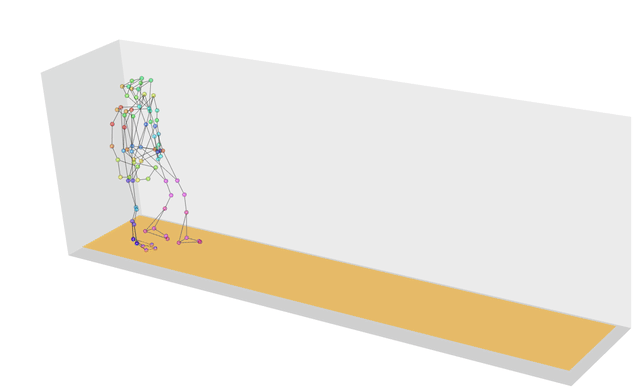

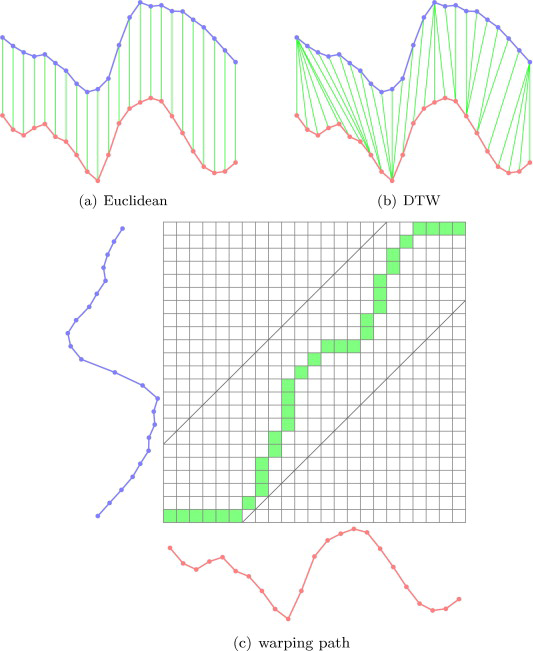

In [29]:
x=videos[0]
y=videos[0]

In [30]:
#get the aligment cost between the signals head and left shoulder during mouvement.
def aligment_cost(x,y):

    x=x.tolist()
    y=y.tolist()
    aligment_cost, distance_mat, cost_mat, path = dtw(x, y, dist=lambda x, y: math.dist(x , y))
    return aligment_cost


In [31]:
%%time
aligment_cost(x['head'],y['left_shoulder'])

Wall time: 297 ms


46.78509789304384

# Apply DWT to the videos data
Align the signals of the joints to create hand crafted features that can be used to train the emotion classifier model

### Creat an empty Data Frame to fill with the video features

__each video will be represented as one row in the our dataset__

In [32]:
video_for_data=videos[0]
column=['feeling','gesture']
for k in video_for_data.iloc[:,5:]:
    for j in video_for_data.iloc[:,5:]:
        if k==j:
            continue
        else:
            column.append(f'{k}_{j}')
    video_for_data=video_for_data.drop(columns=[f'{k}'],axis=1)
data = pd.DataFrame(columns=column)
data

,feeling,gesture,head_left_shoulder,head_right_shoulder,head_left_elbow,head_right_elbow,head_left_hand,head_right_hand,head_left_hip,head_right_hip,...,right_hip_left_knee,right_hip_right_knee,right_hip_left_foot,right_hip_right_foot,left_knee_right_knee,left_knee_left_foot,left_knee_right_foot,right_knee_left_foot,right_knee_right_foot,left_foot_right_foot


### function that take one video data and return a dictionary of features

This row can be appended later to our new data

In [33]:
def DTW_ON_Video(video):
    one_video=video.iloc[:,5:]
    dictionary={}
    for k in one_video:
        for j in one_video:
                if k==j:
                    continue
                else:
                    cost=aligment_cost(video[k],video[j])
                    dictionary[f'{k}_{j}']= cost
                    dictionary['feeling']=video['feeling'][0]
                    dictionary['gesture']=video['gesture'][0]
        one_video=one_video.drop(columns=[f'{k}'],axis=1)
    return dictionary
                    
                    

In [34]:
%%time
DTW_ON_Video(videos[0])

Wall time: 22.4 s


{'head_left_shoulder': 46.78509789304384,
 'feeling': 1,
 'gesture': 1,
 'head_right_shoulder': 49.31845268553217,
 'head_left_elbow': 58.4012744767017,
 'head_right_elbow': 57.77021782494916,
 'head_left_hand': 55.6460935781452,
 'head_right_hand': 58.880900495511355,
 'head_left_hip': 85.72202277938072,
 'head_right_hip': 87.19808576365905,
 'head_left_knee': 100.5636288337099,
 'head_right_knee': 100.40601429941422,
 'head_left_foot': 145.07020726625385,
 'head_right_foot': 143.36391808688768,
 'left_shoulder_right_shoulder': 22.507089802427394,
 'left_shoulder_left_elbow': 21.543232536385794,
 'left_shoulder_right_elbow': 36.38409309138032,
 'left_shoulder_left_hand': 44.69425657166883,
 'left_shoulder_right_hand': 54.20617616846397,
 'left_shoulder_left_hip': 45.18594971580917,
 'left_shoulder_right_hip': 49.59132494390953,
 'left_shoulder_left_knee': 70.51981729263211,
 'left_shoulder_right_knee': 73.91401796920636,
 'left_shoulder_left_foot': 108.76365642794342,
 'left_shoulder_

# Generate Training  data Set

In [11]:
%%time
for video in videos:
    data=data.append(DTW_ON_Video(video), ignore_index=True)

<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

Wall time: 1h 26min 21s


<timed exec>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [23]:
data

,feeling,gesture,head_left_shoulder,head_right_shoulder,head_left_elbow,head_right_elbow,head_left_hand,head_right_hand,head_left_hip,head_right_hip,...,right_hip_left_knee,right_hip_right_knee,right_hip_left_foot,right_hip_right_foot,left_knee_right_knee,left_knee_left_foot,left_knee_right_foot,right_knee_left_foot,right_knee_right_foot,left_foot_right_foot
0,1.0,1.0,46.785098,49.318453,58.401274,57.770218,55.646094,58.880900,85.722023,87.198086,...,34.677330,34.425325,66.253499,64.849339,15.685220,47.537677,48.562873,52.598103,46.131355,20.012941
1,1.0,1.0,19.344407,25.708024,26.444902,35.081393,26.895321,31.519244,36.687422,40.829771,...,26.569994,22.039656,32.575909,31.731293,13.625281,20.169646,26.532650,24.049640,19.099256,16.203376
2,1.0,1.0,18.139118,19.781174,22.748356,25.356577,22.843419,24.489955,35.128772,37.055778,...,18.428795,15.634842,26.678661,26.280484,6.747910,18.430343,21.414080,17.922109,18.603686,6.561165
3,1.0,1.0,18.640758,20.732700,23.542117,27.634729,24.465462,24.494622,33.869783,37.073633,...,24.239796,15.937040,27.667522,25.863975,10.552565,17.436802,27.143851,15.932218,17.953324,11.398266
4,1.0,1.0,18.812834,22.751329,23.429242,30.307833,24.406735,26.971973,35.777938,40.511650,...,28.677495,21.123497,33.346514,30.263933,10.005425,19.258889,25.790495,20.103579,18.414589,10.342426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,3.0,3.0,40.946726,45.955557,64.810577,71.286433,72.570810,75.429555,81.346340,85.704512,...,52.233453,35.920991,83.420110,73.750007,38.018032,42.456369,61.894469,62.018584,43.904417,45.237237
483,3.0,3.0,56.986204,57.853836,81.832591,85.599132,91.990464,92.317550,107.006047,109.189256,...,62.521318,47.347293,105.213875,98.752715,41.103086,53.501364,74.643810,71.449119,57.077500,49.690568
484,3.0,3.0,56.127959,39.685619,84.197275,68.063854,88.146925,84.408661,99.085487,93.529364,...,48.629803,42.181158,96.565552,87.907383,26.244275,53.400412,53.057663,71.130406,53.771476,32.176416
485,3.0,3.0,35.406229,33.630000,51.338836,48.322194,51.572123,50.639157,62.965806,62.276029,...,26.592034,25.259444,56.513329,53.575108,11.338573,37.189026,34.847044,42.815565,37.317411,16.100514


In [14]:
data.to_csv('features_data.csv',index=False)

In [5]:
data=pd.read_csv('features_data.csv')
data

,feeling,gesture,head_left_shoulder,head_right_shoulder,head_left_elbow,head_right_elbow,head_left_hand,head_right_hand,head_left_hip,head_right_hip,...,right_hip_left_knee,right_hip_right_knee,right_hip_left_foot,right_hip_right_foot,left_knee_right_knee,left_knee_left_foot,left_knee_right_foot,right_knee_left_foot,right_knee_right_foot,left_foot_right_foot
0,1.0,1.0,46.785098,49.318453,58.401274,57.770218,55.646094,58.880900,85.722023,87.198086,...,34.677330,34.425325,66.253499,64.849339,15.685220,47.537677,48.562873,52.598103,46.131355,20.012941
1,1.0,1.0,19.344407,25.708024,26.444902,35.081393,26.895321,31.519244,36.687422,40.829771,...,26.569994,22.039656,32.575909,31.731293,13.625281,20.169646,26.532650,24.049640,19.099256,16.203376
2,1.0,1.0,18.139118,19.781174,22.748356,25.356577,22.843419,24.489955,35.128772,37.055778,...,18.428795,15.634842,26.678661,26.280484,6.747910,18.430343,21.414080,17.922109,18.603686,6.561165
3,1.0,1.0,18.640758,20.732700,23.542117,27.634729,24.465462,24.494622,33.869783,37.073633,...,24.239796,15.937040,27.667522,25.863975,10.552565,17.436802,27.143851,15.932218,17.953324,11.398266
4,1.0,1.0,18.812834,22.751329,23.429242,30.307833,24.406735,26.971973,35.777938,40.511650,...,28.677495,21.123497,33.346514,30.263933,10.005425,19.258889,25.790495,20.103579,18.414589,10.342426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,3.0,3.0,40.946726,45.955557,64.810577,71.286433,72.570810,75.429555,81.346340,85.704512,...,52.233453,35.920991,83.420110,73.750007,38.018032,42.456369,61.894469,62.018584,43.904417,45.237237
483,3.0,3.0,56.986204,57.853836,81.832591,85.599132,91.990464,92.317550,107.006047,109.189256,...,62.521318,47.347293,105.213875,98.752715,41.103086,53.501364,74.643810,71.449119,57.077500,49.690568
484,3.0,3.0,56.127959,39.685619,84.197275,68.063854,88.146925,84.408661,99.085487,93.529364,...,48.629803,42.181158,96.565552,87.907383,26.244275,53.400412,53.057663,71.130406,53.771476,32.176416
485,3.0,3.0,35.406229,33.630000,51.338836,48.322194,51.572123,50.639157,62.965806,62.276029,...,26.592034,25.259444,56.513329,53.575108,11.338573,37.189026,34.847044,42.815565,37.317411,16.100514


# Machine Learning

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


#split data
X=data.drop(['feeling', 'gesture'], axis=1)  
y=data['feeling']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)


#Normalization

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)

#Train the model

model=LogisticRegression()
model.fit(X_train_scaled,y_train)

#Scoring

X_test_scaled=scaler.transform(X_test)
y_predicted=model.predict(X_test_scaled)
acc_tr = accuracy_score(y_train, model.predict(X_train_scaled))


print("training accuracy:", acc_tr)
print(classification_report(y_test,y_predicted,labels=data['feeling'].unique()))

training accuracy: 0.9125964010282777
              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89        36
         2.0       0.90      1.00      0.95        28
         3.0       0.90      0.82      0.86        34

    accuracy                           0.90        98
   macro avg       0.90      0.90      0.90        98
weighted avg       0.90      0.90      0.90        98



C:\Users\khale\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Pickling The Model file For Deployment

In [101]:
#pickle.dump(scaler,open('scaling.pkl','wb'))

In [26]:
#pickle.dump(model,open('classification_model.pkl','wb'))

# loading and predicting

# Full deployement from txt_file

In this part we will deploy our model locally by loading a txt file(represent one video after the mediapipe extraction)
do the preprocessing steps(DTW,SCALER..)
generate prediction

In [13]:
classification_model=pickle.load(open('classification_model.pkl','rb'))

In [14]:
scaler=pickle.load(open('scaling.pkl','rb'))

In [144]:
def aligment_cost(x,y):

    x=x.tolist()
    y=y.tolist()
    aligment_cost, distance_mat, cost_mat, path = dtw(x, y, dist=lambda x, y: math.dist(x , y))
    return aligment_cost

def DTW_ON_Video(video):
    one_video=video.iloc[:,1:]
    dictionary={}
    for k in one_video:
        for j in one_video:
                if k==j:
                    continue
                else:
                    cost=aligment_cost(video[k],video[j])
                    dictionary[f'{k}_{j}']= cost
        one_video=one_video.drop(columns=[f'{k}'],axis=1)
    return dictionary
                    
                    
def txt_file_to_input_features_of_1video(full_path):
    
    # Read text file
    rows = []
    with open(full_path, 'r') as f:
         rows = f.readlines()

    # Extract coordinates and times row by row
    coordinates = []
    times = []
    for i, row in enumerate(rows):
        data = row.split()
        if (("x:" in data) or ("y:" in data) or ("z:" in data)) and (len(data) > 1) and ('{' not in data) and ('visibility:' not in data) and ("time_interval:" not in data) and ("NoneNonetime_interval:" not in data):
            coordinates.append(data[1])
        if ("time_interval:" in data):
            times.append(data[1])

    # Reshape to get a frame per row and split real / world coordinates
    frames = np.reshape(coordinates, (-1, 99)) 
    real_crd = frames[::2]
    
    if len(times)==0:
        for i in range(int(len(frames)/2)):
            times.append(0.03)
    
    time_intervals = np.reshape(times, (-1, len(times)))
    
    # Concatenate time and coordinates 
    final_res_real = np.concatenate((time_intervals.T, real_crd), axis=1)

    df_real = pd.DataFrame(final_res_real)

    # Keep only a subset of the key points
    subset = [0,1,2,3,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87]
    df_real_f = df_real[subset]
    
    df=df_real_f.apply(pd.to_numeric)
    df = df.rename(columns={0: 'time', 1:'head_x', 2: 'head_y', 3: 'head_z', 
                                          34: 'left_shoulder_x', 35: 'left_shoulder_y', 36: 'left_shoulder_z',
                                          37: 'right_shoulder_x', 38: 'right_shoulder_y', 39: 'right_shoulder_z',
                                          40: 'left_elbow_x', 41: 'left_elbow_y', 42: 'left_elbow_z',
                                          43: 'right_elbow_x', 44: 'right_elbow_y', 45: 'right_elbow_z',
                                          46: 'left_hand_x', 47: 'left_hand_y', 48: 'left_hand_z',
                                          49: 'right_hand_x', 50: 'right_hand_y', 51: 'right_hand_z',
                                          70: 'left_hip_x', 71: 'left_hip_y', 72: 'left_hip_z',
                                          73: 'right_hip_x', 74: 'right_hip_y', 75: 'right_hip_z',
                                          76: 'left_knee_x', 77: 'left_knee_y', 78: 'left_knee_z',
                                          79: 'right_knee_x', 80: 'right_knee_y', 81: 'right_knee_z',
                                          82: 'left_foot_x', 83: 'left_foot_y', 84: 'left_foot_z',
                                          85: 'right_foot_x',86: 'right_foot_y', 87: 'right_foot_z',})
    df["head"]          =  df[["head_x", "head_y",'head_z']].values.tolist()
    df["left_shoulder"] =  df[["left_shoulder_x", "left_shoulder_y",'left_shoulder_z']].values.tolist()
    df["right_shoulder"]=  df[["right_shoulder_x", "right_shoulder_y",'right_shoulder_z']].values.tolist()
    df["left_elbow"]    =  df[["left_elbow_x", "left_elbow_y",'left_elbow_z']].values.tolist()
    df["right_elbow"]   =  df[["right_elbow_x", "right_elbow_y",'right_elbow_z']].values.tolist()
    df["left_hand"]     =  df[["left_hand_x", "left_hand_y",'left_hand_z']].values.tolist()
    df["right_hand"]    =  df[["right_hand_x", "right_hand_y",'right_hand_z']].values.tolist()
    df["left_hip"]      =  df[["left_hip_x", "left_hip_y",'left_hip_z']].values.tolist()
    df["right_hip"]     =  df[["right_hip_x", "right_hip_y",'right_hip_z']].values.tolist()
    df["left_knee"]     =  df[["left_knee_x", "left_knee_y",'left_knee_z']].values.tolist()
    df["right_knee"]    =  df[["right_knee_x", "right_knee_y",'right_knee_z']].values.tolist()
    df["left_foot"]     =  df[["left_foot_x", "left_foot_y",'left_foot_z']].values.tolist()
    df["right_foot"]    =  df[['right_foot_x','right_foot_y','right_foot_z']].values.tolist()
    df=df.drop(['right_hip_x','right_hip_y','right_hip_z','head_x','head_y','head_z','left_shoulder_x','left_shoulder_y','left_shoulder_z','right_shoulder_x','right_shoulder_y','right_shoulder_z','left_elbow_x','left_elbow_y','left_elbow_z','right_elbow_x','right_elbow_y','right_elbow_z','left_hand_x','left_hand_y','left_hand_z','right_hand_x','right_hand_y','right_hand_z','left_hip_x','left_hip_y','left_hip_z','left_knee_x','left_knee_y','left_knee_z','right_knee_x','right_knee_y','right_knee_z','left_foot_x','left_foot_y','left_foot_z','right_foot_x','right_foot_y','right_foot_z'], axis=1)
    
    #Apply the DWT
    video_dct=DTW_ON_Video(df)
    features=pd.json_normalize(video_dct)
    prediction=classification_model.predict(scaler.transform(features))
    if prediction[0]==1:
        print('By the judging of your movements, I think you are feeling Happy, glad to!')
    if prediction[0]==2:
        print('By the judging of your movements, I think you are feeling a bit angry, want sugar?')
    if prediction[0]==3:
        print('By the judging of your movements, I think you are feeling a bit sad, want a hug?')
    
    return prediction

In [153]:
%%time
def on_upload_change(change):
    if not change.new:
        return
    up = change.owner
    for filename,data in up.value.items():
        print(filename)
        txt_file_to_input_features_of_1video(filename)

    up.value.clear()
    up._counter = 0

upload_btn = FileUpload()
upload_btn.observe(on_upload_change, names='_counter')
upload_btn

Wall time: 34.4 ms


FileUpload(value={}, description='Upload')

01-01-01-09.txt
By the judging of your movements, I think you are feeling Happy, glad to!


In [154]:
%%time
txt_file_to_input_features_of_1video('01-01-01-09.txt')

By the judging of your movements, I think you are feeling Happy, glad to!
Wall time: 4.45 s


array([1.])